In [66]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

**Models For DoW Attack Detection based on Multivariate Distribution Outlier Detection**

In identifying anomalies within multivariate datasets, diverse models such as Isolation Forest, Local Outlier Factor (LOF), Elliptic Envelope, and One-Class Support Vector Machine (SVM) are employed. These models utilize distinct methodologies to evaluate outliers by scrutinizing the distribution and interdependencies among multiple features concurrently. Their efficacy may fluctuate contingent on the dataset's attributes and the specific anomalies under scrutiny. Consequently, it is imperative to conduct thorough exploration and comparative analysis of these models to pinpoint the optimal choice for a given anomaly detection assignment.

**Isolation Forest Model for DoW Attack Detection Based on Multivariate Distribution Outlier Detection**

These models are designed to identify outliers in multivariate datasets by considering the distribution and relationships among multiple features simultaneously. Each model has its strengths and may perform differently based on the characteristics of the dataset and the nature of the anomalies being detected. Therefore, it's essential to experiment with different models to determine which one best suits the specific requirements of the detection task.

**Reasons for Using the Isolation Forest Model**

1. Efficient Anomaly Detection: Isolation Forest is known for its efficiency in identifying anomalies, particularly in high-dimensional datasets. It constructs isolation trees by randomly selecting features and splitting data points, isolating anomalies more quickly than traditional methods.

2. Multivariate Distribution Analysis: Unlike some other models that focus on univariate outlier detection, Isolation Forest considers the multivariate distribution of the data. This capability allows it to capture complex relationships and interactions among different features, which is crucial for detecting anomalies in function workloads where multiple metrics may exhibit abnormal behavior simultaneously.

3. Scalability: Isolation Forest is well-suited for large-scale datasets commonly encountered in cybersecurity applications. Its efficient algorithm and low computational complexity make it scalable to analyze large volumes of data efficiently, which is essential for timely detection of DoW attacks.

4. Robust to Noise: Isolation Forest is robust to noise and outliers present in the data. It can effectively handle skewed distributions and data with varying levels of noise, making it suitable for real-world datasets where the presence of noisy or irrelevant features is common.

5. Interpretability: Isolation Forest provides interpretable results, allowing for a clear understanding of the detected anomalies. By isolating anomalous data points in the feature space, it enables analysts to interpret the reasons behind the detected anomalies, facilitating further investigation and response.

Overall, Isolation Forest offers a combination of efficiency, scalability, and effectiveness in detecting anomalies in multivariate datasets, making it a compelling choice for our analysis of function workloads to detect anomalies indicative of DoW attacks.







In [67]:
# Loading the dataset
data = pd.read_csv('dataset.csv')

In [68]:
# Converting Categorical Variables to Numerical Variables for use by the model
data['bot'] = data['bot'].astype(int)
data = pd.get_dummies(data, columns = ['vmcategory'])

In [69]:
# Dropping irrelevant columns from the dataset
data.drop(columns=['Id', 'IP', 'FunctionId', 'functionTrigger', 'timestamp'], inplace=True)


In [70]:
# Splitting the dataset into features and labels (X = Features, y = Labels)
X = data.drop(columns=['bot'])
y = data['bot']

In [71]:
# Normalizing the Features
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

In [72]:
# Split data into training and testing sets with a 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42)

# **Constructing an Isolation Forest Model**

The Isolation Forest algorithm serves as an unsupervised learning technique for detecting anomalies. It distinguishes outliers by isolating them within a forest of decision trees. This methodology proves highly effective for identifying anomalies within high-dimensional datasets featuring intricate relationships.

The code snippet `IsolationForest(contamination=0.1, random_state=42)` instantiates an Isolation Forest model object with the following parameters:

1. `contamination`: Denotes the proportion of outliers within the dataset. In this instance, it's set to 0.1, indicating that approximately 10% of the data points are regarded as outliers.

2. `random_state`: Establishes the random seed to ensure reproducibility during the model training phase. This ensures consistent outcomes across different executions.

3. **Model Object (iso_forest)**
The model object `iso_forest` is created using the Isolation Forest model configured with the specified parameters.

Through the creation of the Isolation Forest model, we prepare to train the model on the dataset and identify anomalies based on deviations from the majority of data points. This methodology proves effective for identifying anomalies within functional workloads by analyzing factors like processing time and content, thereby offering a robust detection mechanism for Denial of Wallet (DoW) attacks.


In [73]:
# Building the Isolation Forest Classifier
# Instantiate the Isolation Forest model
iso_forest_clf = IsolationForest(contamination=0.1, random_state=42)

In [74]:
# Training the Classifier
iso_forest_clf.fit(X_train, y_train)

IsolationForest(contamination=0.1, random_state=42)

# **Performing Predictions on the Test Set**

In this section, we employ the trained Isolation Forest model to make predictions on the test set.

1. **Prediction Procedure:**


- The code snippet `y_pred = iso_forest.predict(X_test)` generates predictions for the instances within the test set using the trained Isolation Forest model (`iso_forest`) and the feature matrix of the test set (`X_test`).
- The Isolation Forest algorithm identifies anomalies by randomly selecting a feature and then randomly choosing a split value within the range of the selected feature's maximum and minimum values.
- This recursive process continues until all instances are isolated into individual trees or clusters, facilitating efficient outlier detection.


2. **Outcome of Predictions:**


- `y_pred`: This array comprises the predicted labels for the instances in the test set. Each label indicates whether the corresponding instance is an outlier (labeled as -1) or a normal data point (labeled as 1) as per the Isolation Forest model.
- These predicted labels offer insights into the abnormality level of each instance. A label of -1 suggests that an instance is likely an outlier or anomaly, while a label of 1 suggests that an instance is deemed normal.


By executing predictions on the test set, we assess the Isolation Forest model's performance in anomaly detection and its capacity to generalize to new, unseen data.


In [75]:
# Making Predictions on the testing set
y_pred = iso_forest_clf.predict(X_test)

# **Performance Evaluation**


In [76]:
# Making predictions on the testing set and measuring the times

start_time = time.time()
y_pred = iso_forest_clf.predict(X_test)
end_time = time.time()

print('Start Time: ',start_time)
print('End Time: ',end_time)

Start Time:  1711102211.4874644
End Time:  1711102211.927798


### Perfomance Overhead and Delay

In [77]:
# Calculating the Performance Overhead and Delay
overhead = end_time - start_time
delay = overhead / len(X_test)

print("Overhead (Time taken by the model to make predictions):", overhead, "seconds")
print("Delay (Average time taken per data point for prediction):", delay, "seconds")

Overhead (Time taken by the model to make predictions): 0.44033360481262207 seconds
Delay (Average time taken per data point for prediction): 7.845308048045006e-06 seconds


### Accuracy

In [78]:
# Evaluating Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of dataset:", accuracy)

Accuracy of dataset: 0.62506458567178


# Data Analysis

### Confusion Matrix

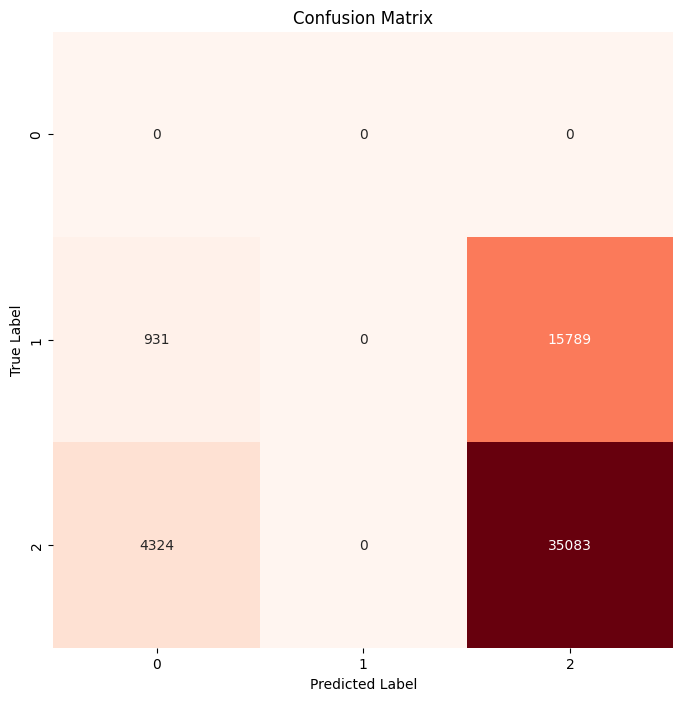

In [79]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### ROC Curve

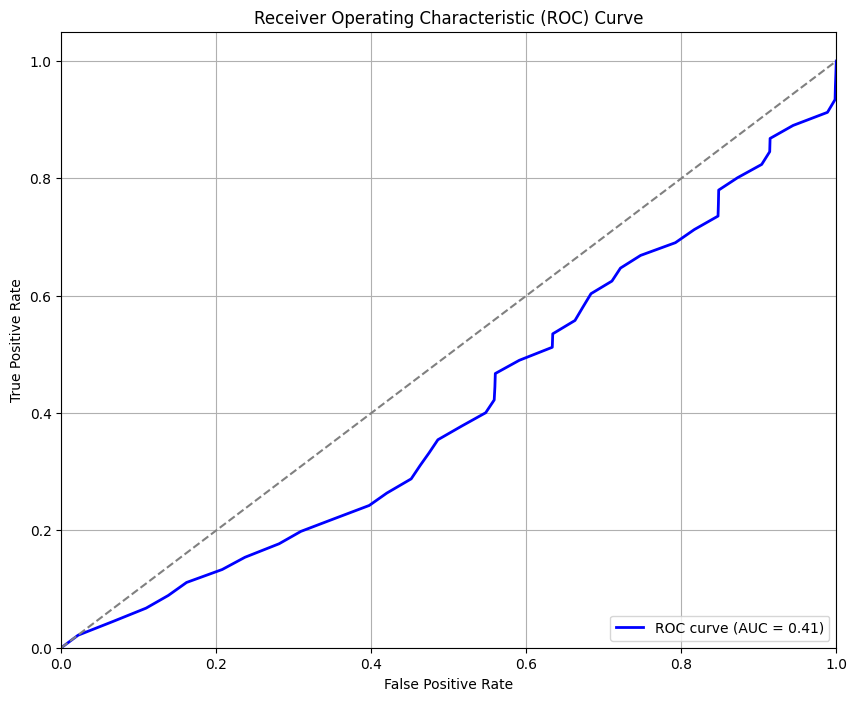

In [80]:

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# Calculate probabilities of predictions for class 1 (DoW attack)
y_prob = iso_forest_clf.decision_function(X_test)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


### Precision-Recall Curve

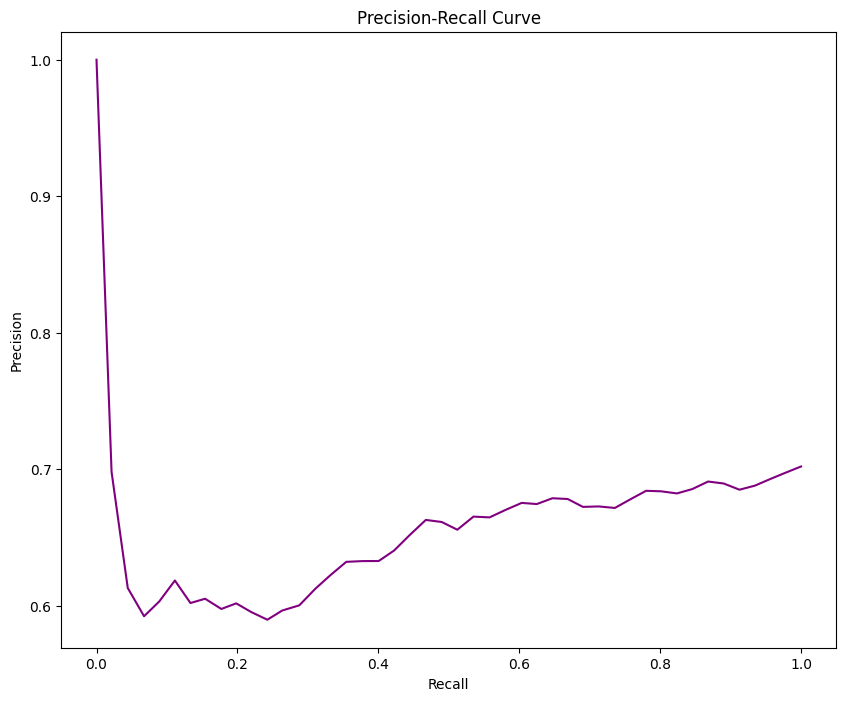

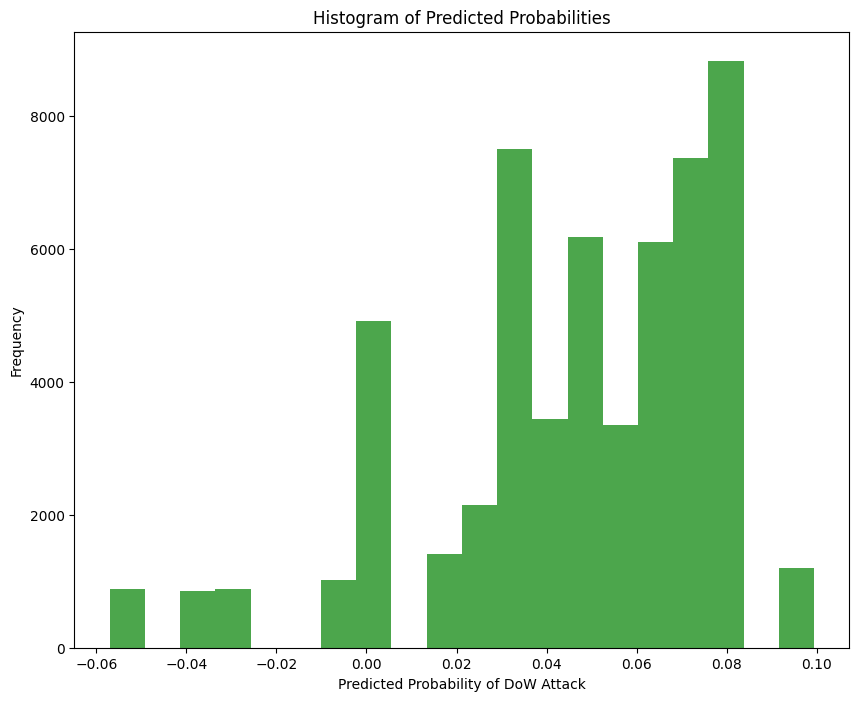

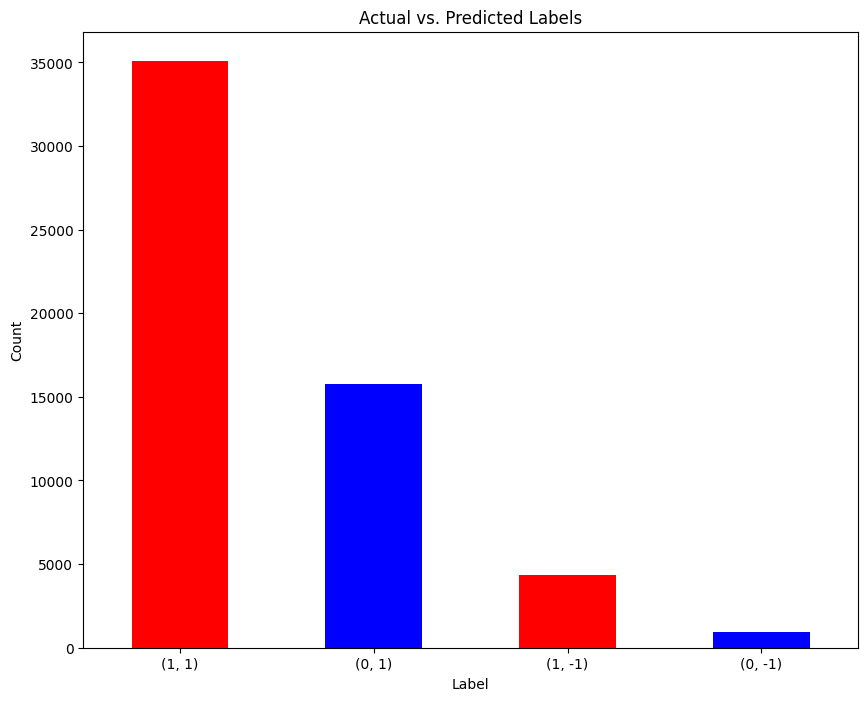

In [81]:

from sklearn.metrics import precision_recall_curve

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


# Plotting the histogram of predicted probabilities
plt.figure(figsize=(10, 8))
plt.hist(y_prob, bins=20, color='green', alpha=0.7)

# Adding labels and titles
plt.xlabel('Predicted Probability of DoW Attack')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.show()


# Bar Chart of Actual vs. Predicted Labels
actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plt.figure(figsize=(10, 8))
actual_vs_predicted.value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title('Actual vs. Predicted Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
